## **Importing The Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x_train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
x_test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
x_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex
# Age	Age in years
# sibsp	# of siblings / spouses aboard the Titanic
# parch	# of parents / children aboard the Titanic
# ticket	Ticket number
# fare	Passenger fare	(highly dependent of the pclass)
# cabin	Cabin number
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## **EDA**

In [5]:
## Age and cabin has missing values.
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
x_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_num  = x_train[["SibSp","Age","Parch","Fare"]]
df_cat = x_train[["Survived","Pclass","Sex","Cabin","Embarked","Ticket"]]

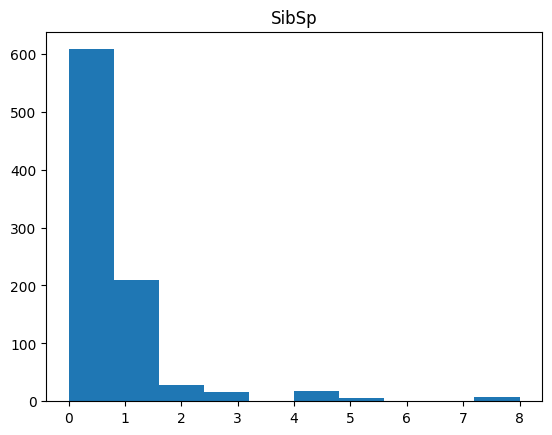

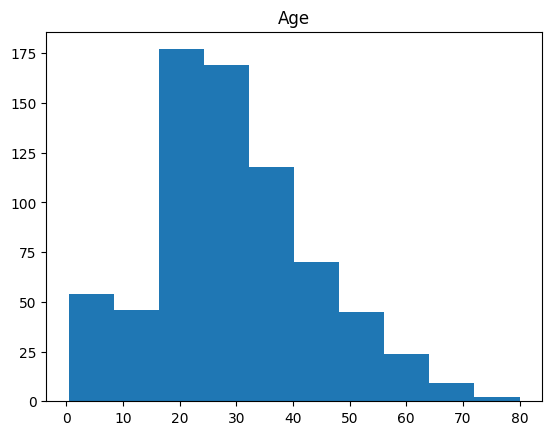

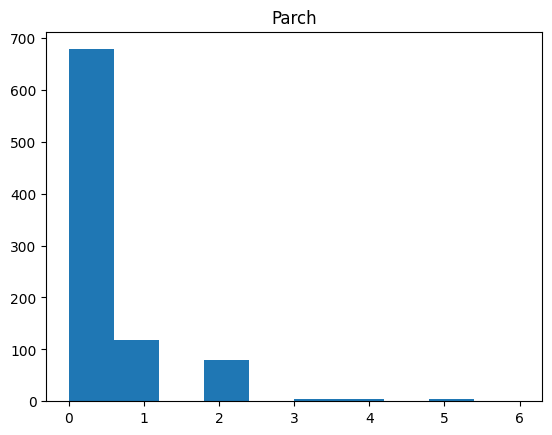

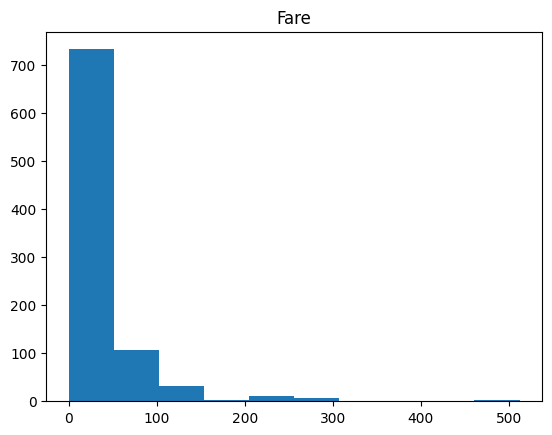

In [8]:
## Plot Histogram of Numeric Features
for col in df_num.columns :
  plt.hist(df_num[col])
  plt.title(col)
  plt.show()

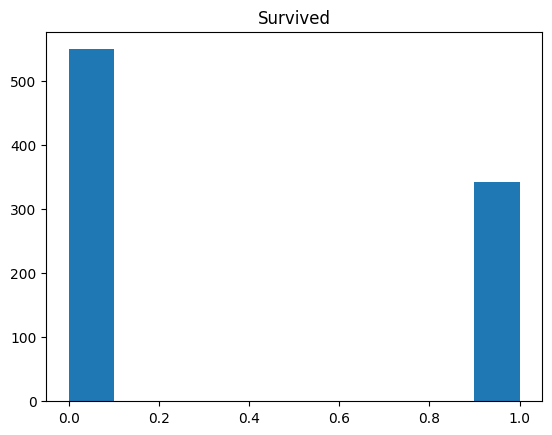

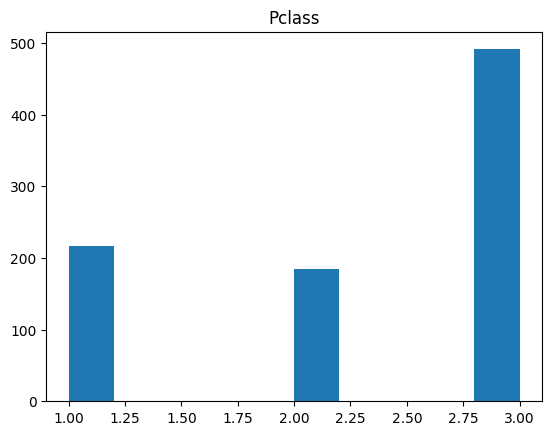

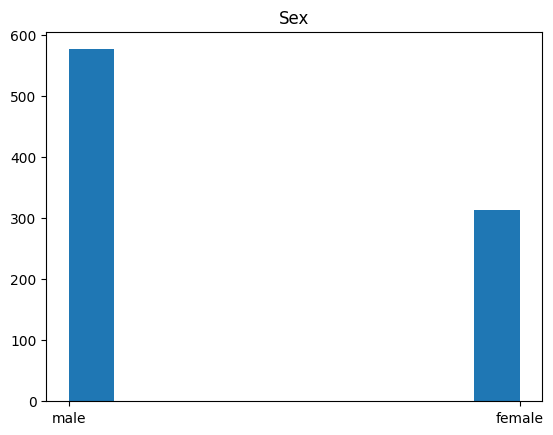

Error in plotting column: 
Cabin
Error in plotting column: 
Embarked
Error in plotting column: 
Ticket


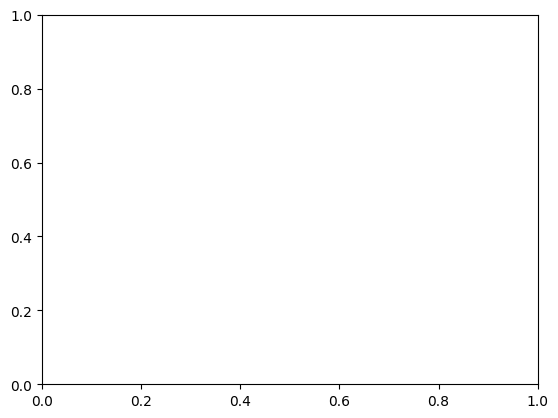

In [9]:
## Same For categorical
for col in df_cat.columns :
  try :
   plt.hist(df_cat[col])
   plt.title(col)
   plt.show()
  except :
    print("Error in plotting column: ")
    print(col)

In [10]:
## Value_counts for numerical
for col in df_num.columns :
  print(df_num[col].value_counts())
  print("--------------------------")


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
--------------------------
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
--------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
--------------------------
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
--------------------------


In [11]:
## Same For categorical
for col in df_cat.columns :
  print(df_cat[col].value_counts())
  print("--------------------------")
## The Class Survived seem balanced which is good for our analysis 61% survived 39% not survived
## The Class Cabin ,Ticket has a lot of classes


0    549
1    342
Name: Survived, dtype: int64
--------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------------
male      577
female    314
Name: Sex, dtype: int64
--------------------------
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
--------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
--------------------------
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
--------------------------


          SibSp       Age     Parch      Fare
SibSp  1.000000 -0.308247  0.414838  0.159651
Age   -0.308247  1.000000 -0.189119  0.096067
Parch  0.414838 -0.189119  1.000000  0.216225
Fare   0.159651  0.096067  0.216225  1.000000


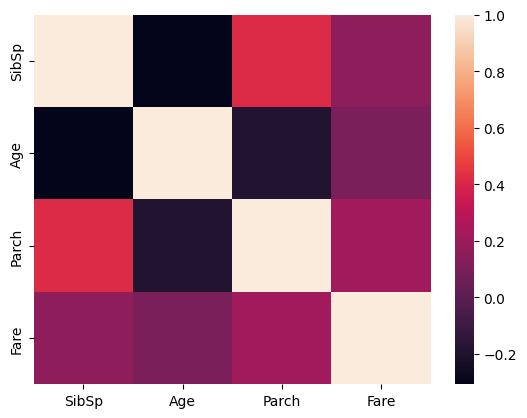

In [12]:
## Correlations Between features
import seaborn as sns
print(df_num.corr())
sns.heatmap(df_num.corr()) ;
## consider a correlation of higher than 0.2
## there is a correlation between Parch and SibSp (number of parents & number of siblings)
## Notice corrlation matrix are important in regressions problems because a strong corrleation between 2 feature can overhelm the model

In [13]:
## Construct a pivot table to see the mean of each population that has survived or not
pd.pivot_table(x_train , index="Survived",values= ["SibSp","Age","Parch","Fare"])
## seem like the pclass or the highest Fare for the trip affected on survival rate
## high Fare high chance to survive

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


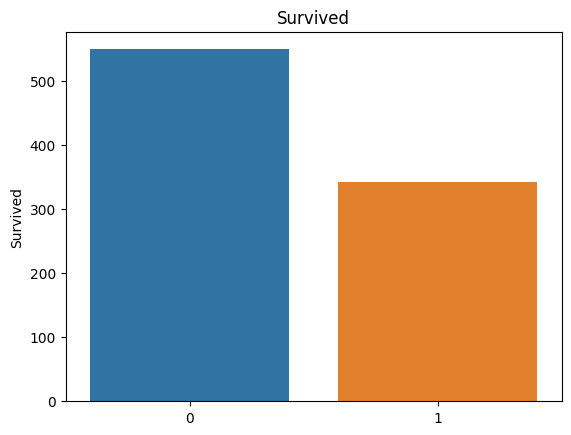

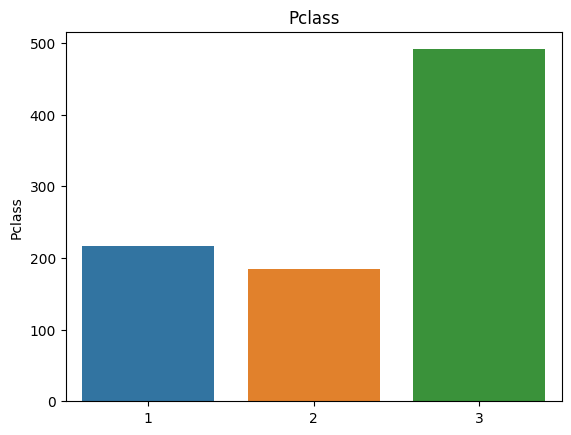

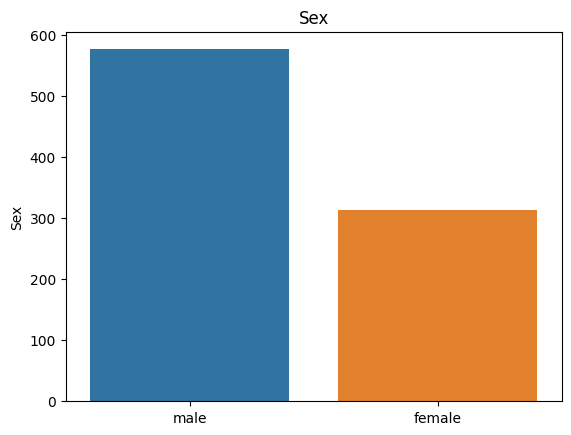

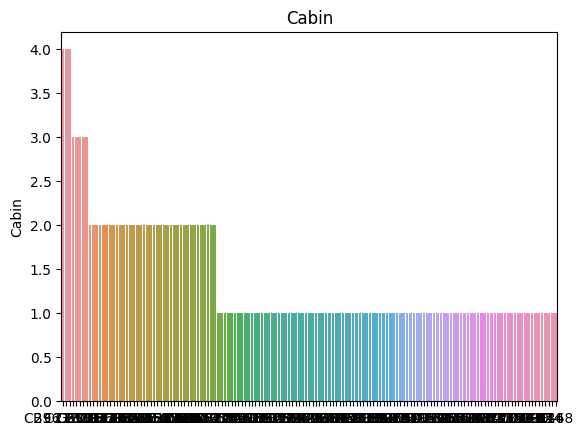

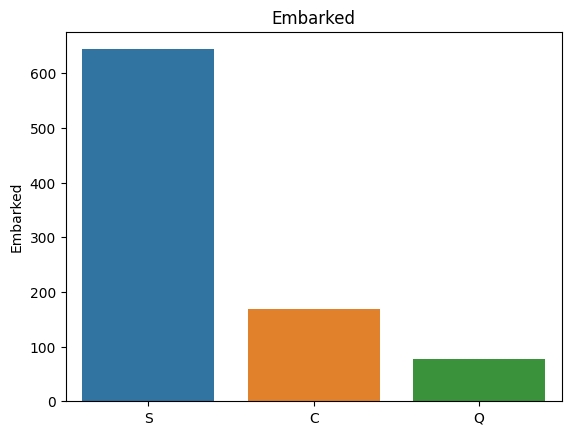

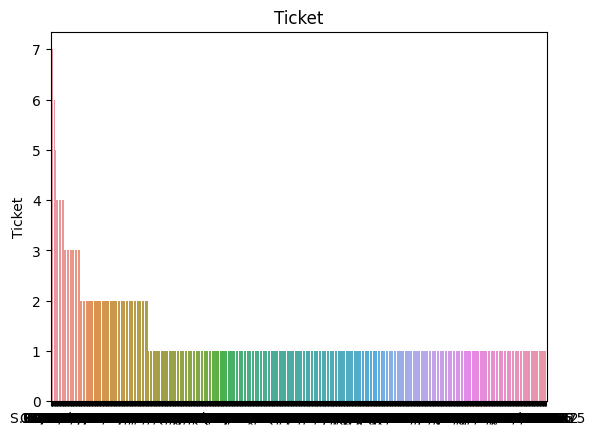

In [14]:
## draw a bar char for categorical feature instead of Histogram
## Ticket / Cabin has a lot of classes
for col in df_cat.columns:
    sns.barplot(x=df_cat[col].value_counts().index,y= df_cat[col].value_counts())
    plt.title(col)
    plt.show()

Survived    0    1
Sex               
female     81  233
male      468  109
*********************


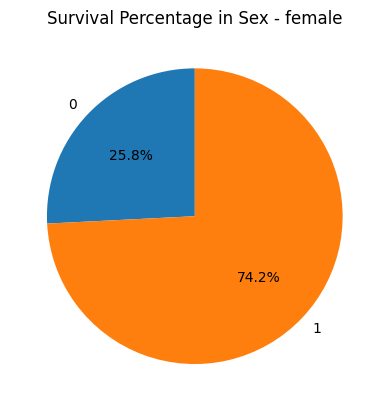

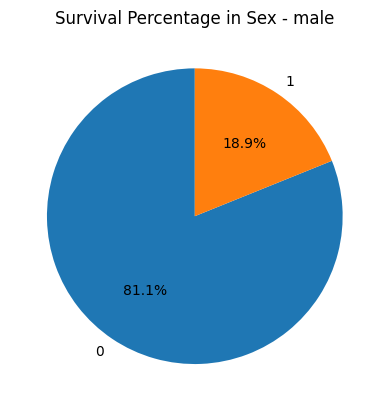

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
*********************


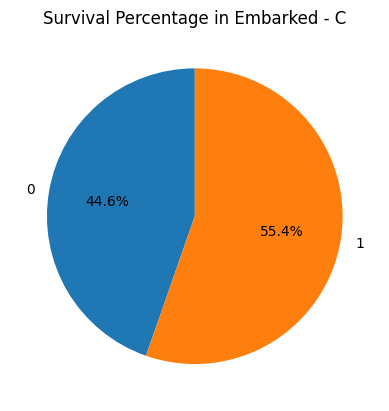

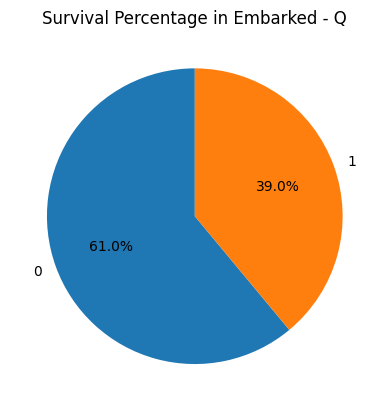

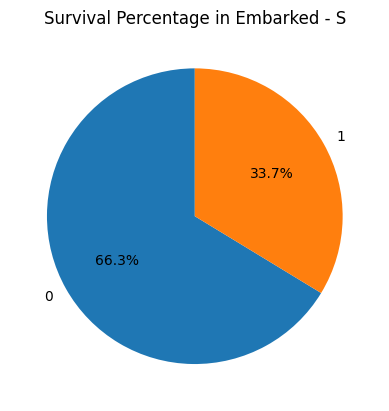

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
*********************


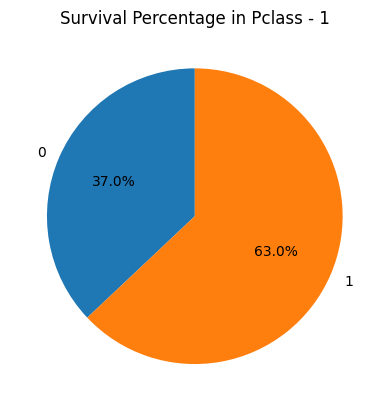

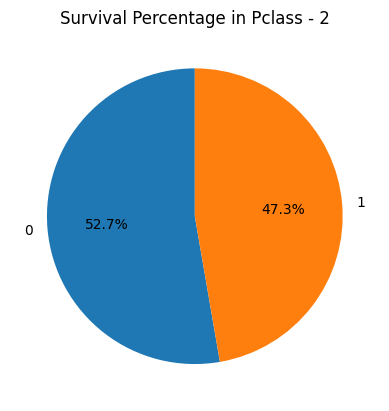

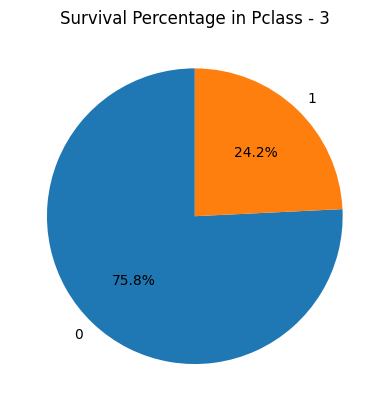

In [15]:
## Construct a pivot table to classes of different features that has survived or not
cols = ["Sex", "Embarked", "Pclass"]
for col in cols:
    # Create a pivot table
    pivot_table_result = pd.pivot_table(x_train, index=col, columns="Survived", values="PassengerId", aggfunc="count")

    # Display the pivot table
    print(pivot_table_result)
    print("*********************")

    # Create a pie chart for each class within the feature
    for index in pivot_table_result.index:
        labels = pivot_table_result.columns
        sizes = pivot_table_result.loc[index]
        plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
        plt.title(f"Survival Percentage in {col} - {index}")
        plt.show()





From Pie charts to be : A woman , Pclass 1 , Embarked in C => you have a higher chance to survive

## **Feature Engineering**

#### Resolving Cabin Feature

In [16]:
# Ticket and Cabin must be reduced
## Handling Cabin
df_cat["Cabin"].value_counts()


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Categorizing the feature that has many classes to a smaller classes and hpefully finding insights

 1) Group by the number of substring in Cabin name

In [17]:
x_train["Cabin_multiple"] = x_train["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split()))
x_train["Cabin_multiple"].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [18]:
## Calculate the survival_rate for each
pivot_table_result = pd.pivot_table(x_train, index="Cabin_multiple", columns="Survived", values="PassengerId", aggfunc="count")
print(pivot_table_result)

Survived            0      1
Cabin_multiple              
0               481.0  206.0
1                58.0  122.0
2                 7.0    9.0
3                 3.0    3.0
4                 NaN    2.0


2) Group by first letter (probably mean the cabin are in the same location or same floor maybe)

In [19]:
## Convert to a string and extract first letter by applying lambda on each element in the column
x_train["Cabin_adv"] = x_train["Cabin"].apply(lambda x: str(x)[0])
x_train["Cabin_adv"].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_adv, dtype: int64

In [20]:
## People that has cabin number in the dataset most probably they have survived
## We can used this as a categorical
pivot_table_result = pd.pivot_table(x_train, index="Cabin_adv", columns="Survived", values="PassengerId", aggfunc="count")
print(pivot_table_result)

Survived       0      1
Cabin_adv              
A            8.0    7.0
B           12.0   35.0
C           24.0   35.0
D            8.0   25.0
E            8.0   24.0
F            5.0    8.0
G            2.0    2.0
T            1.0    NaN
n          481.0  206.0


### Resolving Ticket Feature

In [21]:
df_cat["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

1) Group by numeric or not

In [22]:
x_train["numeric_ticket"] = x_train["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0 )
x_train["numeric_ticket"].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [23]:
## not great insights
pivot_table_result = pd.pivot_table(x_train, index="numeric_ticket", columns="Survived", values="PassengerId", aggfunc="count")
print(pivot_table_result)

Survived          0    1
numeric_ticket          
0               142   88
1               407  254


2) Group by letters

In [24]:
x_train['letters_ticket'] = x_train["Ticket"].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower()
 if len(x.split(' ')[:-1]) >0 else 0)
x_train["letters_ticket"].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: letters_ticket, dtype: int64

In [25]:
pivot_table_result = pd.pivot_table(x_train, index="Survived", columns="letters_ticket", values="Ticket", aggfunc="count")
print(pivot_table_result)

letters_ticket      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                  ...   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

letters_ticket  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                       
0               5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1               1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0  

[2 rows x 29 columns]


### Resolving Name

In [26]:
x_train["Name"].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [27]:
## Group by the title
x_train['name_title'] = x_train["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
x_train["name_title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [28]:
pivot_table_result = pd.pivot_table(x_train, index="name_title", columns="Survived", values="PassengerId", aggfunc="count")
print(pivot_table_result)

Survived          0      1
name_title                
Capt            1.0    NaN
Col             1.0    1.0
Don             1.0    NaN
Dr              4.0    3.0
Jonkheer        1.0    NaN
Lady            NaN    1.0
Major           1.0    1.0
Master         17.0   23.0
Miss           55.0  127.0
Mlle            NaN    2.0
Mme             NaN    1.0
Mr            436.0   81.0
Mrs            26.0   99.0
Ms              NaN    1.0
Rev             6.0    NaN
Sir             NaN    1.0
the Countess    NaN    1.0


## **Data Preprocessing**

In [29]:
x_train['train_test'] = 1
x_test['train_test'] = 0
x_test['Survived'] = np.NaN
all_data = pd.concat([x_train,x_test])
all_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiple,Cabin_adv,numeric_ticket,letters_ticket,name_title,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,n,0.0,a5,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,C,0.0,pc,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,n,0.0,stono2,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,C,1.0,0,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,n,1.0,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,NaN,NaN,NaN,NaN,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN,NaN,NaN,NaN,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,0


### 1) Drop null values from Embarked (only 2)

In [30]:
all_data.dropna(subset=['Embarked'],inplace = True)
all_data.shape

(1307, 18)

### 2) Create all categorical variables that we did above for both training and test sets

In [31]:
all_data['Cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['Cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['letters_ticket'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiple,Cabin_adv,numeric_ticket,letters_ticket,name_title,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,a5,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,pc,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,stono2,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,0,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,n,0,a5,Mr,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,C,0,pc,Dona,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,n,0,sotonoq,Mr,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,n,1,0,Mr,0


### 3) Fill null continus data

In [32]:
## age distribution
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1044 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1306 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  Cabin_multiple  1307 non-null   int64  
 13  Cabin_adv       1307 non-null   object 
 14  numeric_ticket  1307 non-null   int64  
 15  letters_ticket  1307 non-null   object 
 16  name_title      1307 non-null   object 
 17  train_test      1307 non-null   in

### 4) Normalization
 (SibSp - Parch - Fare)





In [33]:
## Mean vs Median .... if data contain outliers and has skewed distribution => Median
## normally distributed and does not have significant outliers => mean
all_data.Age = all_data.Age.fillna(x_train.Age.median())
all_data.Fare = all_data.Fare.fillna(x_train.Fare.median())

<Axes: >

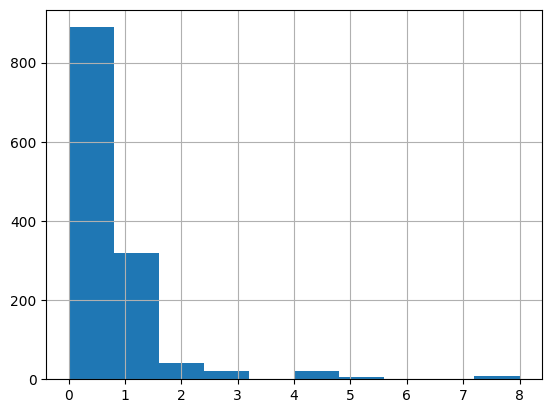

In [34]:
all_data["SibSp"].hist()

<Axes: >

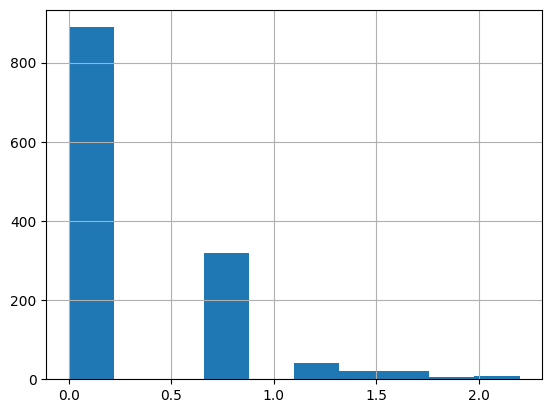

In [35]:
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

In [36]:
## Same to Parch and Fare
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_parch'] = np.log(all_data.Parch+1)


### 5) Feature Selection .. Changing types

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  Cabin_multiple  1307 non-null   int64  
 13  Cabin_adv       1307 non-null   object 
 14  numeric_ticket  1307 non-null   int64  
 15  letters_ticket  1307 non-null   object 
 16  name_title      1307 non-null   object 
 17  train_test      1307 non-null   in

In [38]:
## change the Pclass into categorical
all_data.Pclass = all_data.Pclass.astype(str)

## Get dummies for all categorical features
all_dummies = pd.get_dummies(all_data
 [['Pclass','Sex','SibSp','Age','Parch','norm_fare','Embarked','Cabin_adv',
         'Cabin_multiple','numeric_ticket','name_title','train_test']])

In [39]:
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SibSp                    1307 non-null   int64  
 1   Age                      1307 non-null   float64
 2   Parch                    1307 non-null   int64  
 3   norm_fare                1307 non-null   float64
 4   Cabin_multiple           1307 non-null   int64  
 5   numeric_ticket           1307 non-null   int64  
 6   train_test               1307 non-null   int64  
 7   Pclass_1                 1307 non-null   uint8  
 8   Pclass_2                 1307 non-null   uint8  
 9   Pclass_3                 1307 non-null   uint8  
 10  Sex_female               1307 non-null   uint8  
 11  Sex_male                 1307 non-null   uint8  
 12  Embarked_C               1307 non-null   uint8  
 13  Embarked_Q               1307 non-null   uint8  
 14  Embarked_S               

### 6) Split to Train and Test Again

In [40]:
all_dummies.head()

,SibSp,Age,Parch,norm_fare,Cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,1,22.0,0,2.110213,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,0,4.280593,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,26.0,0,2.188856,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,0,3.990834,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,35.0,0,2.202765,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [41]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)
X_train.shape , X_test.shape

((889, 41), (418, 41))

In [42]:
y_train = all_data[all_data.train_test==1].Survived
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64

### 7) Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

,SibSp,Age,Parch,norm_fare,Cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0.480272,-0.580261,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.480272,0.662297,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.479537,-0.269621,-0.445407,-0.815013,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.480272,0.429318,-0.445407,1.048255,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.479537,0.429318,-0.445407,-0.800632,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.479537,-0.114301,-0.445407,-0.800632,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,-0.479537,0.739957,-0.445407,1.781098,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,-0.479537,0.701127,-0.445407,-0.896331,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,-0.479537,-0.114301,-0.445407,-0.800632,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [44]:
all_dummies.describe()

,SibSp,Age,Parch,norm_fare,Cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.499617,29.471821,0.385616,2.977061,0.270849,0.730681,0.680184,0.245601,0.211936,0.542464,...,0.046672,0.198164,0.001530,0.000765,0.579189,0.149962,0.001530,0.006121,0.000765,0.000765
std,1.042273,12.881592,0.866092,0.967476,0.573882,0.443776,0.466584,0.430608,0.408836,0.498384,...,0.211016,0.398769,0.039103,0.027661,0.493878,0.357171,0.039103,0.078026,0.027661,0.027661
min,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,2.737881,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,35.000000,0.000000,3.474293,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,80.000000,9.000000,6.240917,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
all_dummies_scaled

,SibSp,Age,Parch,norm_fare,Cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0.480272,-0.580261,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.480272,0.662297,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.479537,-0.269621,-0.445407,-0.815013,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.480272,0.429318,-0.445407,1.048255,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.479537,0.429318,-0.445407,-0.800632,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.479537,-0.114301,-0.445407,-0.800632,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,-0.479537,0.739957,-0.445407,1.781098,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,-0.479537,0.701127,-0.445407,-0.896331,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,-0.479537,-0.114301,-0.445407,-0.800632,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [46]:
## Split Again the Data
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

# **Modeling**

Trying Different Models

In [47]:

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [48]:
##1 naive bayes (baseline)
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [49]:
##2 logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [50]:
##3 Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75280899 0.75280899 0.84269663 0.75280899 0.83615819]
0.7874563575192026


In [51]:
##4 Kneighbours
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.78651685 0.83146067 0.79775281 0.85310734]
0.8133180981400369


In [52]:
##5 Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.79213483 0.83707865 0.73595506 0.83615819]
0.8031866945978544


In [53]:
##6 Support Vector Machine (Highest)
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [54]:
##7 Xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.80898876 0.85393258 0.78651685 0.80225989]
0.8110137751539389


In [55]:
##8 Voting Classifer
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.81460674 0.83707865 0.79775281 0.84180791]
0.8245413572018029


# **Model Tuning**

Using Techiniques  => Grid_Search and Randomized Search

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [57]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [58]:
## Improving Logistic Regression
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [59]:
## Improving KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8290611312131023
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [60]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVC
Best Score: 0.8279375357074844
Best Parameters: {'kernel': 'poly', 'degree': 3, 'C': 1}


In [61]:
## Improving SVC
svc = SVC(probability = True)
param_grid = tuned_parameters = [
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVC
Best Score: 0.8324382657271631
Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}


In [62]:
## Improving Random Forest
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}

clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8335428172411603
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}


In [64]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,150,200],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [None,100],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest
Best Score: 0.8335428172411603
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Feature Importance for random forest

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<Axes: >

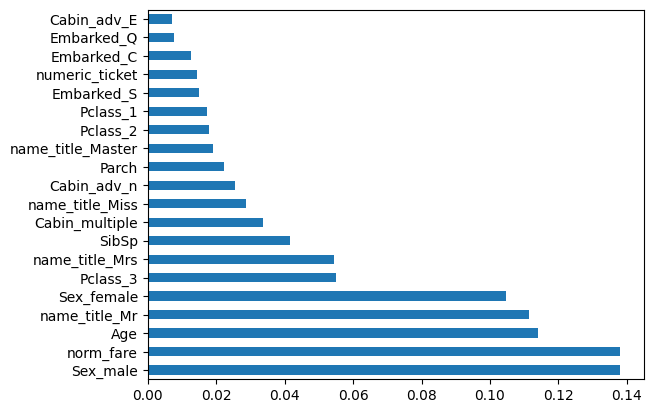

In [65]:
## Features Importances for Random Forrest
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [67]:
## Improving XGBoost
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8503967498254301
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.6}


# **Submission**

In [68]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,NaN


In [69]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': x_test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)